### Import Libraries

In [1]:
# data processing
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data...

In [2]:
# get the data
survey_df = pd.read_csv("ACME-HappinessSurvey2020.csv")

### Exploratory Data Analysis

In [3]:
# Display the data
survey_df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
# Display data type
survey_df.dtypes

Y     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object

In [5]:
# Find missing values
survey_df.isna().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

` We can already observe that there are no missing values in the dataset and that all the columns are integers. `

### A description of the features is listed below:

---

   Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.
   
      Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
      X1 = my order was delivered on time
      X2 = contents of my order was as I expected
      X3 = I ordered everything I wanted to order
      X4 = I paid a good price for my order
      X5 = I am satisfied with my courier
      X6 = the app makes ordering easy for me

In [6]:
# display general statistics of data
survey_df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


`From the statistics above, in terms of ordered content, most of the customers expectations were sort of dashed.` This metric received the lowest average in terms of satisfaction (2.5)

In [7]:
survey_df.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [8]:

unhappy = survey_df.loc[survey_df["Y"]==0, :]
happy = survey_df.loc[survey_df["Y"]==1,:]

c:\Users\evans\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
c:\Users\evans\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid d

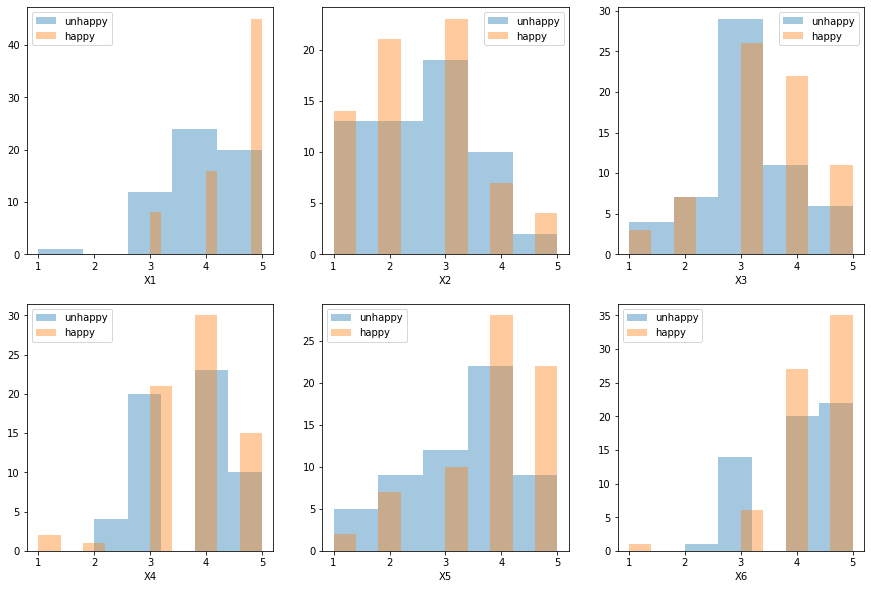

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
ax = sns.distplot(unhappy["X1"], label = "unhappy", kde=False, bins =5, ax = axes[0,0])
ax = sns.distplot(happy["X1"], label = "happy", kde=False, bins =10, ax = axes[0,0])
ax.legend()
ax = sns.distplot(unhappy["X2"], label = "unhappy", kde=False, bins =5, ax = axes[0,1])
ax = sns.distplot(happy["X2"], label = "happy", kde=False, bins =10, ax = axes[0,1])
ax.legend()
ax = sns.distplot(unhappy["X3"], label = "unhappy", kde=False, bins =5, ax = axes[0,2])
ax = sns.distplot(happy["X3"], label = "happy", kde=False, bins =10, ax = axes[0,2])
ax.legend()
ax = sns.distplot(unhappy["X4"], label = "unhappy", kde=False, bins =5, ax = axes[1,0])
ax = sns.distplot(happy["X4"], label = "happy", kde=False, bins =10, ax = axes[1,0])
ax.legend()
ax = sns.distplot(unhappy["X5"], label = "unhappy", kde=False, bins =5, ax = axes[1,1])
ax = sns.distplot(happy["X5"], label = "happy", kde=False, bins =10, ax = axes[1,1])
ax.legend()
ax = sns.distplot(unhappy["X6"], label = "unhappy", kde=False, bins =5, ax = axes[1,2])
ax = sns.distplot(happy["X6"], label = "happy", kde=False, bins =10, ax = axes[1,2])
ax.legend()
plt.show()

### Building Machine Learning Models

In [92]:
# Algorithms
from sklearn.model_selection import train_test_split
# from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [47]:
# Seperate the features, X,  from the target variable, y
y = survey_df['Y']
X = survey_df.drop(columns='Y')

In [50]:
# Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### Stochastic gradient descent (SGD) learning

In [59]:
# create a SGD classifier instance
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)

# Fitting the model
sgd.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = sgd.predict(X_test)

# Return the mean accuracy on the given test data and labels
sgd.score(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

print(f"accuracy_score: {round(acc_sgd,2,)} %")

accuracy_score: 47.87 %


#### Random Forest Learning

In [109]:
# create a random forest instance
random_forest = RandomForestClassifier(n_estimators=100, random_state=78)

# Fitting the model
random_forest.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = random_forest.predict(X_test)

# Return the mean accuracy on the given test data and labels
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

# Print the accuracy score
print(f"accuracy_score: {round(acc_random_forest,3)} %")

accuracy_score: 97.87 %


#### Logistic regression learning

In [70]:
# create a logistic regression instance
logreg = LogisticRegression(random_state=9)

# Fitting the model
logreg.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = logreg.predict(X_test)

# Return the mean accuracy on the given test data and labels
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

# Print the accuracy score
print(f"accuracy_score: {round(acc_log,2)} %")

accuracy_score: 59.57 %


#### Perceptron Learning

In [73]:
# create a perceptron instance
perc = Perceptron(random_state=9)

# Fitting the model
perc.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = perc.predict(X_test)

# Return the mean accuracy on the given test data and labels
acc_perc = round(perc.score(X_train, y_train) * 100, 2)

# Print the accuracy score
print(f"accuracy_score: {round(acc_perc,2)} %")

accuracy_score: 53.19 %


#### Linear Support Vector Classifier

In [91]:
# create a linear SVC instance
linear_svc = LinearSVC(random_state=101, max_iter=5000)

# Fitting the model
linear_svc.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = linear_svc.predict(X_test)

# Return the mean accuracy on the given test data and labels
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

# Print the accuracy score
print(f"accuracy_score: {round(acc_linear_svc,2)} %")

accuracy_score: 60.64 %


#### Decision Tree Classifer

In [110]:
# create a linear SVC instance
decision_tree = DecisionTreeClassifier()
# Fitting the model
decision_tree.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = decision_tree.predict(X_test)

# Return the mean accuracy on the given test data and labels
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

# Print the accuracy score
print(f"accuracy_score: {round(acc_decision_tree,3)} %")

accuracy_score: 97.87 %


`Both Decission tree and Random Forest model had similar scores and were the highest. Now let's perform cross validation to ascertain the model generalization`

In [118]:
# Import cross val score 
from sklearn.model_selection import cross_val_score

# create a random forest instance
rf = RandomForestClassifier(n_estimators=100)

# create a decision tree instance
dtc = DecisionTreeClassifier()

scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring = "accuracy")
scores_dtc = cross_val_score(dtc, X_train, y_train, cv=5, scoring = "accuracy")

In [119]:
# Print cross validation score for Random forest Classifier
print("Scores_rf:", scores_rf)
print("Mean_rf:", scores_rf.mean())
print("Standard Deviation_rf:", scores_rf.std())

Scores_rf: [0.68421053 0.57894737 0.68421053 0.57894737 0.72222222]
Mean_rf: 0.6497076023391812
Standard Deviation_rf: 0.05941934875265748


In [120]:
# Print cross validation score for Decision Tree Classifier
print("Scores_dtc:", scores_dtc)
print("Mean_dtc:", scores_dtc.mean())
print("Standard Deviation_dtc:", scores_dtc.std())

Scores_dtc: [0.68421053 0.68421053 0.42105263 0.68421053 0.66666667]
Mean_dtc: 0.6280701754385964
Standard Deviation_dtc: 0.10373154736206656
